# Sentiment Analysis of Text

### Sentiment Analysis
 One of the most popular projects in the industry. Every customer facing industry (retail, telecom, finance, etc.) is interested in identifying their customers’ sentiment, whether they think positive or negative about them.

Python sentiment analysis is a methodology for analyzing a piece of text to discover the sentiment hidden within it. It accomplishes this by combining machine learning and natural language processing (NLP). Sentiment analysis allows you to examine the feelings expressed in a piece of text.

### About Sentiment Analysis
In this machine learning project, we build a binary text classifier to classify the sentiment behind the text. We use the various NLP preprocessing techniques to clean the data and utilize the LSTM layers to build the text classifier.

### Sentiment Analysis of Text Dataset
The dataset contains more than 14000 tweets data samples classified into 3 types: positive, negative, neutral


# Step 1: Data Preprocessing
### Import all required libraries

In [ ]:
pip install pandas matplotlib tensorflow


##Import data set


In [ ]:
import pandas as pd
data_source = "https://raw.githubusercontent.com/akashlilhare/sentiment_analysis/main/data.csv"
df = pd.read_csv(data_source)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
review_df = df[['text','airline_sentiment']]

print(review_df.shape)
review_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
review_df = review_df[review_df['airline_sentiment'] != 'neutral']
print(review_df.shape)
review_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [ ]:
review_df["airline_sentiment"].value_counts()


negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
sentiment_label = review_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [ ]:
tweet = review_df.text.values


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(tweet)


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

padded_sequence

array([[   0,    0,    0, ...,    1,    2,  177],
       [   0,    0,    0, ...,   25,  482, 2417],
       [   0,    0,    0, ...,  483,   86,   21],
       ...,
       [   0,    0,    0, ...,    8,    1,  480],
       [   0,    0,    0, ..., 1682,   45,  945],
       [   0,    0,    0, ...,  144,   11, 2325]], dtype=int32)

# 2. Build the Text Classifier

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


embedding_vector_length = 32
vocab_size = 132340
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           4234880   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4,251,531
Trainable params: 4,251,531
Non-trainable params: 0
____________________________________________

# 3. Train the sentiment analysis model

Train the sentiment analysis model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%.

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 101s 336ms/step - loss: 0.3933 - accuracy: 0.8344 - val_loss: 0.2015 - val_accuracy: 0.9281
Epoch 2/5
289/289 [==============================] - 79s 273ms/step - loss: 0.2460 - accuracy: 0.9039 - val_loss: 0.1827 - val_accuracy: 0.9346
Epoch 3/5
289/289 [==============================] - 78s 271ms/step - loss: 0.1765 - accuracy: 0.9336 - val_loss: 0.1691 - val_accuracy: 0.9389
Epoch 4/5
289/289 [==============================] - 79s 272ms/step - loss: 0.1426 - accuracy: 0.9492 - val_loss: 0.1645 - val_accuracy: 0.9415
Epoch 5/5
289/289 [==============================] - 78s 272ms/step - loss: 0.1206 - accuracy: 0.9547 - val_loss: 0.1760 - val_accuracy: 0.9415


The python sentiment analysis model obtained 96% accuracy on the training set and 94.33% accuracy on the test set.

Let’s plot these metrics using the matplotlib.

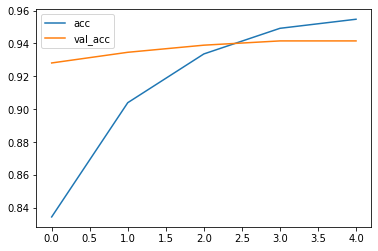

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")


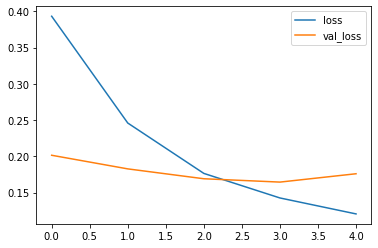

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

# Python Sentiment Analysis Output

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)


Predicted label:  positive
Predicted label:  negative


#Summary
We have successfully developed python sentiment analysis model. In this machine learning project, we built a binary text classifier that classifies the sentiment of the tweets into positive and negative. We obtained more than 94% accuracy on validation.